In [74]:
# import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install scipy

# Importovanje potrebnih paketa za rad sa algoritmima nadgledanog učenja

In [179]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold
from sklearn.linear_model import LogisticRegression, LassoCV, Ridge
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report,r2_score, mean_squared_error, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import iqr
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.decomposition import PCA

# Učitavanje dataset-a

In [76]:
dataset = pd.read_csv("dataset.csv")
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Deskriptivna analiza dataset-a
### - MEAN

In [77]:
#Mean
dataset.mean()

word_freq_make                  0.104553
word_freq_address               0.213015
word_freq_all                   0.280656
word_freq_3d                    0.065425
word_freq_our                   0.312223
word_freq_over                  0.095901
word_freq_remove                0.114208
word_freq_internet              0.105295
word_freq_order                 0.090067
word_freq_mail                  0.239413
word_freq_receive               0.059824
word_freq_will                  0.541702
word_freq_people                0.093930
word_freq_report                0.058626
word_freq_addresses             0.049205
word_freq_free                  0.248848
word_freq_business              0.142586
word_freq_email                 0.184745
word_freq_you                   1.662100
word_freq_credit                0.085577
word_freq_your                  0.809761
word_freq_font                  0.121202
word_freq_000                   0.101645
word_freq_money                 0.094269
word_freq_hp    

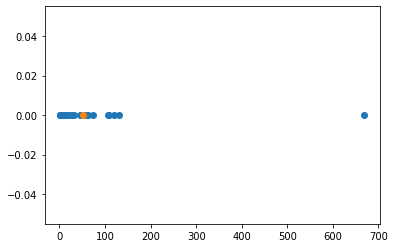

In [78]:
y = np.zeros((25))
plt.scatter(random.sample(list(dataset['capital_run_length_longest']),25), y)
plt.scatter(dataset['capital_run_length_longest'].mean(),0)

### - MEDIAN

In [79]:
# Median
dataset.median()

word_freq_make                 0.000
word_freq_address              0.000
word_freq_all                  0.000
word_freq_3d                   0.000
word_freq_our                  0.000
word_freq_over                 0.000
word_freq_remove               0.000
word_freq_internet             0.000
word_freq_order                0.000
word_freq_mail                 0.000
word_freq_receive              0.000
word_freq_will                 0.100
word_freq_people               0.000
word_freq_report               0.000
word_freq_addresses            0.000
word_freq_free                 0.000
word_freq_business             0.000
word_freq_email                0.000
word_freq_you                  1.310
word_freq_credit               0.000
word_freq_your                 0.220
word_freq_font                 0.000
word_freq_000                  0.000
word_freq_money                0.000
word_freq_hp                   0.000
word_freq_hpl                  0.000
word_freq_george               0.000
w

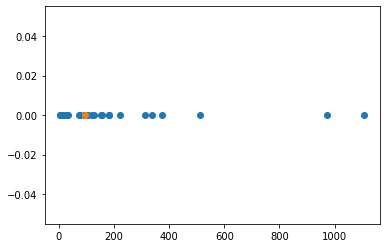

In [80]:
y = np.zeros((25))
plt.scatter(random.sample(list(dataset['capital_run_length_total']),25), y)
plt.scatter(dataset['capital_run_length_total'].median(),0)

### - MODE 

In [81]:
# Mode
dataset.mode()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label_spam
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5,0


### - STANDARD DEVIATION 

In [82]:
#Standard deviation
dataset.std()

word_freq_make                  0.305358
word_freq_address               1.290575
word_freq_all                   0.504143
word_freq_3d                    1.395151
word_freq_our                   0.672513
word_freq_over                  0.273824
word_freq_remove                0.391441
word_freq_internet              0.401071
word_freq_order                 0.278616
word_freq_mail                  0.644755
word_freq_receive               0.201545
word_freq_will                  0.861698
word_freq_people                0.301036
word_freq_report                0.335184
word_freq_addresses             0.258843
word_freq_free                  0.825792
word_freq_business              0.444055
word_freq_email                 0.531122
word_freq_you                   1.775481
word_freq_credit                0.509767
word_freq_your                  1.200810
word_freq_font                  1.025756
word_freq_000                   0.350286
word_freq_money                 0.442636
word_freq_hp    

### - VARIANCE 

In [83]:
# Variance
dataset.var()

word_freq_make                     0.093243
word_freq_address                  1.665584
word_freq_all                      0.254160
word_freq_3d                       1.946447
word_freq_our                      0.452273
word_freq_over                     0.074980
word_freq_remove                   0.153226
word_freq_internet                 0.160858
word_freq_order                    0.077627
word_freq_mail                     0.415710
word_freq_receive                  0.040620
word_freq_will                     0.742524
word_freq_people                   0.090623
word_freq_report                   0.112348
word_freq_addresses                0.067000
word_freq_free                     0.681932
word_freq_business                 0.197185
word_freq_email                    0.282091
word_freq_you                      3.152332
word_freq_credit                   0.259862
word_freq_your                     1.441944
word_freq_font                     1.052175
word_freq_000                   

### - INTERQUARTILE RANGE

In [84]:
# Interquartile Range
for column in dataset.columns:
    print(column + ": "+ str(iqr(dataset[column])))

word_freq_make: 0.0
word_freq_address: 0.0
word_freq_all: 0.42
word_freq_3d: 0.0
word_freq_our: 0.38
word_freq_over: 0.0
word_freq_remove: 0.0
word_freq_internet: 0.0
word_freq_order: 0.0
word_freq_mail: 0.16
word_freq_receive: 0.0
word_freq_will: 0.8
word_freq_people: 0.0
word_freq_report: 0.0
word_freq_addresses: 0.0
word_freq_free: 0.1
word_freq_business: 0.0
word_freq_email: 0.0
word_freq_you: 2.64
word_freq_credit: 0.0
word_freq_your: 1.27
word_freq_font: 0.0
word_freq_000: 0.0
word_freq_money: 0.0
word_freq_hp: 0.0
word_freq_hpl: 0.0
word_freq_george: 0.0
word_freq_650: 0.0
word_freq_lab: 0.0
word_freq_labs: 0.0
word_freq_telnet: 0.0
word_freq_857: 0.0
word_freq_data: 0.0
word_freq_415: 0.0
word_freq_85: 0.0
word_freq_technology: 0.0
word_freq_1999: 0.0
word_freq_parts: 0.0
word_freq_pm: 0.0
word_freq_direct: 0.0
word_freq_cs: 0.0
word_freq_meeting: 0.0
word_freq_original: 0.0
word_freq_project: 0.0
word_freq_re: 0.11
word_freq_edu: 0.0
word_freq_table: 0.0
word_freq_conference: 

### - SKEWNESS

In [85]:
# Skewness
dataset.skew()

word_freq_make                 5.675639
word_freq_address             10.086811
word_freq_all                  3.009249
word_freq_3d                  26.227744
word_freq_our                  4.747126
word_freq_over                 5.956953
word_freq_remove               6.765580
word_freq_internet             9.724848
word_freq_order                5.226067
word_freq_mail                 8.487810
word_freq_receive              5.510250
word_freq_will                 2.867354
word_freq_people               6.955548
word_freq_report              11.754645
word_freq_addresses            6.971041
word_freq_free                10.763594
word_freq_business             5.688642
word_freq_email                5.413754
word_freq_you                  1.591674
word_freq_credit              14.602587
word_freq_your                 2.435527
word_freq_font                 9.975441
word_freq_000                  5.713775
word_freq_money               14.687028
word_freq_hp                   5.716843


### - KURTOSIS

In [86]:
# Kurtosis
dataset.kurt()

word_freq_make                  49.305064
word_freq_address              105.647472
word_freq_all                   13.308743
word_freq_3d                   726.451538
word_freq_our                   37.941169
word_freq_over                  68.445258
word_freq_remove                75.413439
word_freq_internet             169.162876
word_freq_order                 46.940256
word_freq_mail                 161.214641
word_freq_receive               39.650945
word_freq_will                  12.550747
word_freq_people                84.941822
word_freq_report               229.201271
word_freq_addresses             57.727676
word_freq_free                 196.424975
word_freq_business              45.673775
word_freq_email                 47.961674
word_freq_you                    5.257394
word_freq_credit               383.001882
word_freq_your                   9.009506
word_freq_font                 109.142325
word_freq_000                   46.807860
word_freq_money                302

# Deskriptivna analiza - pregled 

In [87]:
# Descriptive analysis
dataset.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


### Raspodela podataka po klasama (SPAM or NOT SPAM)

#NOT SPAM:  2788
#SPAM:  1813


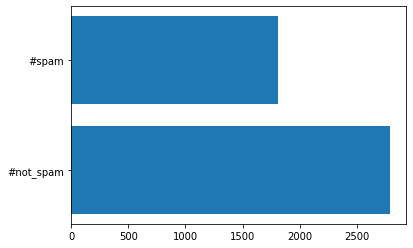

In [88]:
not_spam_count, spam_count = dataset['label_spam'].value_counts()
plt.barh(["#not_spam","#spam"], [not_spam_count, spam_count])
print("#NOT SPAM:  "+str(not_spam_count))
print("#SPAM:  "+ str(spam_count))

### Balansiranje dataseta - UNDERSAMPLING
#### Izbacivanje random uzoraka iz klase sa većim brojem instanci

#NOT SPAM:  1813
#SPAM:  1813


<BarContainer object of 2 artists>

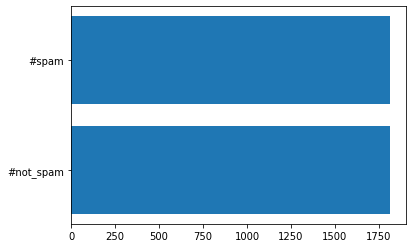

In [89]:
#Solving unbalanced dataset 
#1 undersampling

df_majority_US = dataset[dataset.label_spam == 0]
df_minority_US = dataset[dataset.label_spam == 1]

df_majority_undersampled = resample(df_majority_US, replace = False, n_samples = 1813, random_state = 123)
df_undersampled = pd.concat([df_majority_undersampled, df_minority_US])
undersampled_not_spam, undersampled_spam = df_undersampled .label_spam.value_counts()
print("#NOT SPAM:  "+str(undersampled_not_spam))
print("#SPAM:  "+ str(undersampled_spam))
plt.barh(["#not_spam","#spam"], [undersampled_not_spam, undersampled_spam])

### Balansiranje stabla - OVERSAMPLING

#### Dodavanje duplikata iz klase sa manjim brojem instanci

#NOT SPAM:  2788
#SPAM:  2788


<BarContainer object of 2 artists>

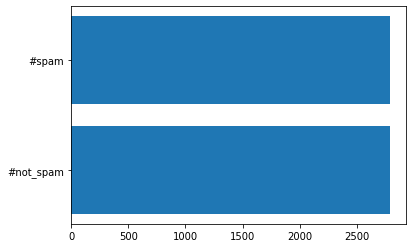

In [90]:
#2 oversampling
df_majority_OS = dataset[dataset.label_spam==0]
df_minority_OS = dataset[dataset.label_spam==1]
df_minority_upsampled = resample(df_minority_OS, 
                                 replace=True,     # sample with replacement
                                 n_samples=2788,    # to match majority class
                                 random_state=123)
df_upsampled = pd.concat([df_majority_OS, df_minority_upsampled])
oversampled_not_spam, oversampled_spam = df_upsampled.label_spam.value_counts()
print("#NOT SPAM:  "+str(oversampled_not_spam))
print("#SPAM:  "+ str(oversampled_spam))
plt.barh(["#not_spam","#spam"], [oversampled_not_spam, oversampled_spam])

# Priprema dataseta za podelu na train i test

### bez balansiranja

In [91]:
X_imbalanced = dataset.drop("label_spam",axis = 1).values
y_imbalanced = dataset["label_spam"].values

X_train_imbalanced,X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X_imbalanced,y_imbalanced,test_size = 0.2, random_state = 1)

### undersampling

In [92]:
X_undersampled = df_undersampled.drop("label_spam",axis = 1).values
y_undersampled = df_undersampled["label_spam"].values

X_train_undersampled,X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled,y_undersampled,test_size = 0.2, random_state = 1)

### upsampling

In [93]:
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values

X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

# Algoritmi za predikciju
### LOGISTIC REGRESSION

### bez balansiranja i cross validacije

In [94]:
logistic_regression_model_imbalanced = LogisticRegression(max_iter = 3000)
logistic_regression_model_imbalanced.fit(X_train_imbalanced,y_train_imbalanced)
prediction_imbalanced = logistic_regression_model_imbalanced.predict(X_test_imbalanced)

#### Različite metrike za evaluaciju prediktivnog algoritma

In [95]:
conf_matrix_imbalanced = confusion_matrix(y_true=y_test_imbalanced,y_pred=prediction_imbalanced)
TP_imbalanced = conf_matrix_imbalanced[1,1]
TN_imbalanced = conf_matrix_imbalanced[0,0]
FP_imbalanced = conf_matrix_imbalanced[0,1]
FN_imbalanced = conf_matrix_imbalanced[1,0]
sensitivity_imbalanced = TP_imbalanced/(TP_imbalanced+FN_imbalanced)
specificity_imbalanced = TN_imbalanced/(TN_imbalanced+FP_imbalanced)
accuracy_imbalanced = accuracy_score(y_test_imbalanced,prediction_imbalanced)*100
f1_imbalanced = f1_score(y_test_imbalanced, prediction_imbalanced)
precision_imbalanced = precision_score(y_test_imbalanced, prediction_imbalanced)
recall_imbalanced = recall_score(y_test_imbalanced, prediction_imbalanced)

#### Prikaz dobijenih evaluacionih parametara

In [96]:
print("Accuracy: ", accuracy_imbalanced)
print("F1 Score: ", f1_imbalanced)
print("Precision: ", precision_imbalanced)
print("Recall: ", recall_imbalanced)
print("Specificity: ", specificity_imbalanced)
print("Sensitivity: ", sensitivity_imbalanced)
print("True positive: ", TP_imbalanced)
print("False positive: ", FP_imbalanced)
print("True negative: ", TN_imbalanced)
print("False negative: ", FN_imbalanced)

Accuracy:  93.70249728555918
F1 Score:  0.9169054441260746
Precision:  0.9384164222873901
Recall:  0.896358543417367
Specificity:  0.9627659574468085
Sensitivity:  0.896358543417367
True positive:  320
False positive:  21
True negative:  543
False negative:  37


### Undersampling bez cross validacije

In [97]:
logistic_regression_model_undersampled = LogisticRegression(max_iter = 3000)
logistic_regression_model_undersampled.fit(X_train_undersampled,y_train_undersampled)
prediction_undersampled = logistic_regression_model_undersampled.predict(X_test_undersampled)

#### Različite metrike za evaluaciju prediktivnog algoritma

In [98]:
conf_matrix_undersampled = confusion_matrix(y_true=y_test_undersampled,y_pred=prediction_undersampled)
TP_undersampled = conf_matrix_undersampled[1,1]
TN_undersampled = conf_matrix_undersampled[0,0]
FP_undersampled = conf_matrix_undersampled[0,1]
FN_undersampled = conf_matrix_undersampled[1,0]
sensitivity_undersampled = TP_undersampled/(TP_undersampled+FN_undersampled)
specificity_undersampled = TN_undersampled/(TN_undersampled+FP_undersampled)
accuracy_undersampled = accuracy_score(y_test_undersampled,prediction_undersampled)*100
f1_undersampled = f1_score(y_test_undersampled, prediction_undersampled)
precision_undersampled = precision_score(y_test_undersampled, prediction_undersampled)
recall_undersampled = recall_score(y_test_undersampled, prediction_undersampled)

#### Prikaz dobijenih evaluacionih parametara

In [99]:
print("Accuracy: ", accuracy_undersampled)
print("F1 Score: ", f1_undersampled)
print("Precision: ", precision_undersampled)
print("Recall: ", recall_undersampled)
print("Specificity: ", specificity_undersampled)
print("Sensitivity: ", sensitivity_undersampled)
print("True positive: ", TP_undersampled)
print("False positive: ", FP_undersampled)
print("True negative: ", TN_undersampled)
print("False negative: ", FN_undersampled)

Accuracy:  92.01101928374655
F1 Score:  0.9171428571428571
Precision:  0.9277456647398844
Recall:  0.9067796610169492
Specificity:  0.9327956989247311
Sensitivity:  0.9067796610169492
True positive:  321
False positive:  25
True negative:  347
False negative:  33


### upsampling bez cross validacije

In [100]:
logistic_regression_model_upsampled = LogisticRegression(max_iter = 3000)
logistic_regression_model_upsampled.fit(X_train_upsampled,y_train_upsampled)
prediction_upsampled = logistic_regression_model_upsampled.predict(X_test_upsampled)

#### Različite metrike za evaluaciju prediktivnog algoritma

In [101]:
conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
TP_upsampled = conf_matrix_upsampled[1,1]
TN_upsampled = conf_matrix_upsampled[0,0]
FP_upsampled = conf_matrix_upsampled[0,1]
FN_upsampled = conf_matrix_upsampled[1,0]
sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)

#### Prikaz dobijenih evaluacionih parametara

In [102]:
print("Accuracy: ", accuracy_upsampled)
print("F1 Score: ", f1_upsampled)
print("Precision: ", precision_upsampled)
print("Recall: ", recall_upsampled)
print("Specificity: ", specificity_upsampled)
print("Sensitivity: ", sensitivity_upsampled)
print("True positive: ", TP_upsampled)
print("False positive: ", FP_upsampled)
print("True negative: ", TN_upsampled)
print("False negative: ", FN_upsampled)

Accuracy:  92.92114695340501
F1 Score:  0.9296527159394479
Precision:  0.9222614840989399
Recall:  0.9371633752244165
Specificity:  0.9212880143112702
Sensitivity:  0.9371633752244165
True positive:  522
False positive:  44
True negative:  515
False negative:  35


### Vizuelizacija nekih mera postignutih rezultata korišćenjem Logistic Regression prediktivnog algoritma bez cross validacije

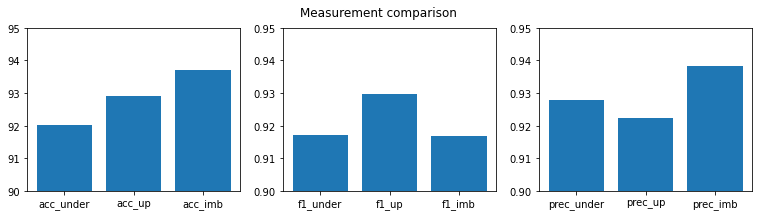

In [104]:
plt.figure(figsize=(13, 3))
plt.subplot(131)
plt.ylim(90,95)
plt.bar(['acc_under', 'acc_up', 'acc_imb'], [accuracy_undersampled, accuracy_upsampled, accuracy_imbalanced])
plt.subplot(132)
plt.ylim(0.9,0.95)
plt.bar(['f1_under', 'f1_up','f1_imb'], [f1_undersampled, f1_upsampled, f1_imbalanced])
plt.subplot(133)
plt.ylim(0.9,0.95)
plt.bar(['prec_under', 'prec_up', 'prec_imb'], [precision_undersampled, precision_upsampled, [precision_imbalanced]])
plt.suptitle('Measurement comparison')
plt.show()


# Logistic regression sa cross validacijom

## bez balansiranja

In [107]:
kf = KFold(n_splits=5,random_state = 42, shuffle = True)

for train_index,test_index in kf.split(X_imbalanced):
    X_train_imbalanced,X_test_imbalanced=X_imbalanced[train_index],X_imbalanced[test_index]
    y_train_imbalanced,y_test_imbalanced=y_imbalanced[train_index],y_imbalanced[test_index]
    
    logistic_regression_model_imbalanced = LogisticRegression(max_iter = 3000)
    logistic_regression_model_imbalanced.fit(X_train_imbalanced,y_train_imbalanced)
    prediction_imbalanced = logistic_regression_model_imbalanced.predict(X_test_imbalanced)
    
    conf_matrix_imbalanced = confusion_matrix(y_true=y_test_imbalanced,y_pred=prediction_imbalanced)
    TP_imbalanced = conf_matrix_imbalanced[1,1]
    TN_imbalanced = conf_matrix_imbalanced[0,0]
    FP_imbalanced = conf_matrix_imbalanced[0,1]
    FN_imbalanced = conf_matrix_imbalanced[1,0]
    sensitivity_imbalanced = TP_imbalanced/(TP_imbalanced+FN_imbalanced)
    specificity_imbalanced = TN_imbalanced/(TN_imbalanced+FP_imbalanced)
    accuracy_imbalanced = accuracy_score(y_test_imbalanced,prediction_imbalanced)*100
    f1_imbalanced = f1_score(y_test_imbalanced, prediction_imbalanced)
    precision_imbalanced = precision_score(y_test_imbalanced, prediction_imbalanced)
    recall_imbalanced = recall_score(y_test_imbalanced, prediction_imbalanced)
    
    print("Accuracy: ", accuracy_imbalanced)
    print("F1 Score: ", f1_imbalanced)
    print("Precision: ", precision_imbalanced)
    print("Recall: ", recall_imbalanced)
    print("Specificity: ", specificity_imbalanced)
    print("Sensitivity: ", sensitivity_imbalanced)
    print("True positive: ", TP_imbalanced)
    print("False positive: ", FP_imbalanced)
    print("True negative: ", TN_imbalanced)
    print("False negative: ", FN_imbalanced)
    print("-------------")

Accuracy:  92.29098805646036
F1 Score:  0.9064558629776021
Precision:  0.9322493224932249
Recall:  0.882051282051282
Specificity:  0.9529190207156308
Sensitivity:  0.882051282051282
True positive:  344
False positive:  25
True negative:  506
False negative:  46
-------------
Accuracy:  92.82608695652173
F1 Score:  0.9080779944289694
Precision:  0.9157303370786517
Recall:  0.9005524861878453
Specificity:  0.946236559139785
Sensitivity:  0.9005524861878453
True positive:  326
False positive:  30
True negative:  528
False negative:  36
-------------
Accuracy:  92.3913043478261
F1 Score:  0.9002849002849003
Precision:  0.9080459770114943
Recall:  0.8926553672316384
Specificity:  0.9434628975265018
Sensitivity:  0.8926553672316384
True positive:  316
False positive:  32
True negative:  534
False negative:  38
-------------
Accuracy:  93.15217391304348
F1 Score:  0.9088277858176554
Precision:  0.9154518950437318
Recall:  0.9022988505747126
Specificity:  0.9493006993006993
Sensitivity:  0.902

### undersampling

In [108]:
kf = KFold(n_splits=5,random_state = 42, shuffle = True)

for train_index,test_index in kf.split(X_undersampled):
    X_train_undersampled,X_test_undersampled=X_undersampled[train_index],X_undersampled[test_index]
    y_train_undersampled,y_test_undersampled=y_undersampled[train_index],y_undersampled[test_index]
    
    logistic_regression_model_undersampled = LogisticRegression(max_iter = 3000)
    logistic_regression_model_undersampled.fit(X_train_undersampled,y_train_undersampled)
    prediction_undersampled = logistic_regression_model_undersampled.predict(X_test_undersampled)
    
    conf_matrix_undersampled = confusion_matrix(y_true=y_test_undersampled,y_pred=prediction_undersampled)
    TP_undersampled = conf_matrix_undersampled[1,1]
    TN_undersampled = conf_matrix_undersampled[0,0]
    FP_undersampled = conf_matrix_undersampled[0,1]
    FN_undersampled = conf_matrix_undersampled[1,0]
    sensitivity_undersampled = TP_undersampled/(TP_undersampled+FN_undersampled)
    specificity_undersampled = TN_undersampled/(TN_undersampled+FP_undersampled)
    accuracy_undersampled = accuracy_score(y_test_undersampled,prediction_undersampled)*100
    f1_undersampled = f1_score(y_test_undersampled, prediction_undersampled)
    precision_undersampled = precision_score(y_test_undersampled, prediction_undersampled)
    recall_undersampled = recall_score(y_test_undersampled, prediction_undersampled)
    
    print("Accuracy: ", accuracy_undersampled)
    print("F1 Score: ", f1_undersampled)
    print("Precision: ", precision_undersampled)
    print("Recall: ", recall_undersampled)
    print("Specificity: ", specificity_undersampled)
    print("Sensitivity: ", sensitivity_undersampled)
    print("True positive: ", TP_undersampled)
    print("False positive: ", FP_undersampled)
    print("True negative: ", TN_undersampled)
    print("False negative: ", FN_undersampled)
    print("-------------")

Accuracy:  93.1129476584022
F1 Score:  0.9273255813953488
Precision:  0.9354838709677419
Recall:  0.9193083573487032
Specificity:  0.941952506596306
Sensitivity:  0.9193083573487032
True positive:  319
False positive:  22
True negative:  357
False negative:  28
-------------
Accuracy:  92.13793103448276
F1 Score:  0.919605077574048
Precision:  0.9209039548022598
Recall:  0.9183098591549296
Specificity:  0.9243243243243243
Sensitivity:  0.9183098591549296
True positive:  326
False positive:  28
True negative:  342
False negative:  29
-------------
Accuracy:  92.6896551724138
F1 Score:  0.9284750337381917
Precision:  0.9347826086956522
Recall:  0.9222520107238605
Specificity:  0.9318181818181818
Sensitivity:  0.9222520107238605
True positive:  344
False positive:  24
True negative:  328
False negative:  29
-------------
Accuracy:  92.55172413793103
F1 Score:  0.9262295081967215
Precision:  0.9442896935933147
Recall:  0.9088471849865952
Specificity:  0.9431818181818182
Sensitivity:  0.908

### upsampling

In [109]:
kf = KFold(n_splits=5,random_state = 42, shuffle = True)

for train_index,test_index in kf.split(X_upsampled):
    X_train_upsampled,X_test_upsampled=X_upsampled[train_index],X_upsampled[test_index]
    y_train_upsampled,y_test_upsampled=y_upsampled[train_index],y_upsampled[test_index]
    
    logistic_regression_model_upsampled = LogisticRegression(max_iter = 3000)
    logistic_regression_model_upsampled.fit(X_train_upsampled,y_train_upsampled)
    prediction_upsampled = logistic_regression_model_upsampled.predict(X_test_upsampled)
    
    conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
    TP_upsampled = conf_matrix_upsampled[1,1]
    TN_upsampled = conf_matrix_upsampled[0,0]
    FP_upsampled = conf_matrix_upsampled[0,1]
    FN_upsampled = conf_matrix_upsampled[1,0]
    sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
    specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
    accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
    f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
    precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
    recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)
    
    print("Accuracy: ", accuracy_upsampled)
    print("F1 Score: ", f1_upsampled)
    print("Precision: ", precision_upsampled)
    print("Recall: ", recall_upsampled)
    print("Specificity: ", specificity_upsampled)
    print("Sensitivity: ", sensitivity_upsampled)
    print("True positive: ", TP_upsampled)
    print("False positive: ", FP_upsampled)
    print("True negative: ", TN_upsampled)
    print("False negative: ", FN_upsampled)
    print("-------------")

Accuracy:  94.17562724014337
F1 Score:  0.9395348837209302
Precision:  0.9404096834264432
Recall:  0.9386617100371747
Specificity:  0.9446366782006921
Sensitivity:  0.9386617100371747
True positive:  505
False positive:  32
True negative:  546
False negative:  33
-------------
Accuracy:  93.45291479820628
F1 Score:  0.9322191272051996
Precision:  0.9400749063670412
Recall:  0.9244935543278084
Specificity:  0.9440559440559441
Sensitivity:  0.9244935543278084
True positive:  502
False positive:  32
True negative:  540
False negative:  41
-------------
Accuracy:  92.19730941704036
F1 Score:  0.923076923076923
Precision:  0.9288256227758007
Recall:  0.9173989455184535
Specificity:  0.9267399267399268
Sensitivity:  0.9173989455184535
True positive:  522
False positive:  40
True negative:  506
False negative:  47
-------------
Accuracy:  93.00448430493273
F1 Score:  0.9292196007259528
Precision:  0.9377289377289377
Recall:  0.920863309352518
Specificity:  0.9391771019677997
Sensitivity:  0.9

## Repeated kfold

### bez balansiranja

In [111]:
kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

for train_index,test_index in kf.split(X_imbalanced):
    X_train_imbalanced,X_test_imbalanced=X_imbalanced[train_index],X_imbalanced[test_index]
    y_train_imbalanced,y_test_imbalanced=y_imbalanced[train_index],y_imbalanced[test_index]
    
    logistic_regression_model_imbalanced = LogisticRegression(max_iter = 3000)
    logistic_regression_model_imbalanced.fit(X_train_imbalanced,y_train_imbalanced)
    prediction_imbalanced = logistic_regression_model_imbalanced.predict(X_test_imbalanced)
    
    conf_matrix_imbalanced = confusion_matrix(y_true=y_test_imbalanced,y_pred=prediction_imbalanced)
    TP_imbalanced = conf_matrix_imbalanced[1,1]
    TN_imbalanced = conf_matrix_imbalanced[0,0]
    FP_imbalanced = conf_matrix_imbalanced[0,1]
    FN_imbalanced = conf_matrix_imbalanced[1,0]
    sensitivity_imbalanced = TP_imbalanced/(TP_imbalanced+FN_imbalanced)
    specificity_imbalanced = TN_imbalanced/(TN_imbalanced+FP_imbalanced)
    accuracy_imbalanced = accuracy_score(y_test_imbalanced,prediction_imbalanced)*100
    f1_imbalanced = f1_score(y_test_imbalanced, prediction_imbalanced)
    precision_imbalanced = precision_score(y_test_imbalanced, prediction_imbalanced)
    recall_imbalanced = recall_score(y_test_imbalanced, prediction_imbalanced)
    
    print("Accuracy: ", accuracy_imbalanced)
    print("F1 Score: ", f1_imbalanced)
    print("Precision: ", precision_imbalanced)
    print("Recall: ", recall_imbalanced)
    print("Specificity: ", specificity_imbalanced)
    print("Sensitivity: ", sensitivity_imbalanced)
    print("True positive: ", TP_imbalanced)
    print("False positive: ", FP_imbalanced)
    print("True negative: ", TN_imbalanced)
    print("False negative: ", FN_imbalanced)
    print("-------------")

Accuracy:  92.84164859002169
F1 Score:  0.9090909090909092
Precision:  0.9217877094972067
Recall:  0.8967391304347826
Specificity:  0.9494584837545126
Sensitivity:  0.8967391304347826
True positive:  165
False positive:  14
True negative:  263
False negative:  19
-------------
Accuracy:  93.91304347826087
F1 Score:  0.9166666666666667
Precision:  0.9447852760736196
Recall:  0.8901734104046243
Specificity:  0.9686411149825784
Sensitivity:  0.8901734104046243
True positive:  154
False positive:  9
True negative:  278
False negative:  19
-------------
Accuracy:  93.26086956521739
F1 Score:  0.9096209912536443
Precision:  0.975
Recall:  0.8524590163934426
Specificity:  0.9855595667870036
Sensitivity:  0.8524590163934426
True positive:  156
False positive:  4
True negative:  273
False negative:  27
-------------
Accuracy:  91.73913043478261
F1 Score:  0.9040404040404041
Precision:  0.927461139896373
Recall:  0.8817733990147784
Specificity:  0.9455252918287937
Sensitivity:  0.881773399014778

Accuracy:  94.57700650759219
F1 Score:  0.9326145552560647
Precision:  0.9301075268817204
Recall:  0.9351351351351351
Specificity:  0.9528985507246377
Sensitivity:  0.9351351351351351
True positive:  173
False positive:  13
True negative:  263
False negative:  12
-------------
Accuracy:  94.1304347826087
F1 Score:  0.9203539823008848
Precision:  0.9069767441860465
Recall:  0.9341317365269461
Specificity:  0.9453924914675768
Sensitivity:  0.9341317365269461
True positive:  156
False positive:  16
True negative:  277
False negative:  11
-------------
Accuracy:  94.34782608695652
F1 Score:  0.9322916666666666
Precision:  0.9521276595744681
Recall:  0.9132653061224489
Specificity:  0.9659090909090909
Sensitivity:  0.9132653061224489
True positive:  179
False positive:  9
True negative:  255
False negative:  17
-------------
Accuracy:  91.73913043478261
F1 Score:  0.8875739644970415
Precision:  0.872093023255814
Recall:  0.9036144578313253
Specificity:  0.9251700680272109
Sensitivity:  0.90

Accuracy:  93.058568329718
F1 Score:  0.9096045197740114
Precision:  0.9415204678362573
Recall:  0.8797814207650273
Specificity:  0.9640287769784173
Sensitivity:  0.8797814207650273
True positive:  161
False positive:  10
True negative:  268
False negative:  22
-------------
Accuracy:  90.8695652173913
F1 Score:  0.8771929824561403
Precision:  0.8670520231213873
Recall:  0.8875739644970414
Specificity:  0.9209621993127147
Sensitivity:  0.8875739644970414
True positive:  150
False positive:  23
True negative:  268
False negative:  19
-------------
Accuracy:  91.95652173913044
F1 Score:  0.8969359331476323
Precision:  0.9252873563218391
Recall:  0.8702702702702703
Specificity:  0.9527272727272728
Sensitivity:  0.8702702702702703
True positive:  161
False positive:  13
True negative:  262
False negative:  24
-------------
Accuracy:  93.69565217391305
F1 Score:  0.9164265129682997
Precision:  0.9298245614035088
Recall:  0.9034090909090909
Specificity:  0.9577464788732394
Sensitivity:  0.90

Accuracy:  91.54013015184381
F1 Score:  0.8828828828828829
Precision:  0.901840490797546
Recall:  0.8647058823529412
Specificity:  0.9450171821305842
Sensitivity:  0.8647058823529412
True positive:  147
False positive:  16
True negative:  275
False negative:  23
-------------
Accuracy:  91.08695652173913
F1 Score:  0.895674300254453
Precision:  0.9166666666666666
Recall:  0.8756218905472637
Specificity:  0.9382239382239382
Sensitivity:  0.8756218905472637
True positive:  176
False positive:  16
True negative:  243
False negative:  25
-------------
Accuracy:  93.26086956521739
F1 Score:  0.9159891598915989
Precision:  0.9285714285714286
Recall:  0.9037433155080213
Specificity:  0.9523809523809523
Sensitivity:  0.9037433155080213
True positive:  169
False positive:  13
True negative:  260
False negative:  18
-------------


KeyboardInterrupt: 

### undersampling

In [112]:
kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

for train_index,test_index in kf.split(X_undersampled):
    X_train_undersampled,X_test_undersampled=X_undersampled[train_index],X_undersampled[test_index]
    y_train_undersampled,y_test_undersampled=y_undersampled[train_index],y_undersampled[test_index]
    
    logistic_regression_model_undersampled = LogisticRegression(max_iter = 3000)
    logistic_regression_model_undersampled.fit(X_train_undersampled,y_train_undersampled)
    prediction_undersampled = logistic_regression_model_undersampled.predict(X_test_undersampled)
    
    conf_matrix_undersampled = confusion_matrix(y_true=y_test_undersampled,y_pred=prediction_undersampled)
    TP_undersampled = conf_matrix_undersampled[1,1]
    TN_undersampled = conf_matrix_undersampled[0,0]
    FP_undersampled = conf_matrix_undersampled[0,1]
    FN_undersampled = conf_matrix_undersampled[1,0]
    sensitivity_undersampled = TP_undersampled/(TP_undersampled+FN_undersampled)
    specificity_undersampled = TN_undersampled/(TN_undersampled+FP_undersampled)
    accuracy_undersampled = accuracy_score(y_test_undersampled,prediction_undersampled)*100
    f1_undersampled = f1_score(y_test_undersampled, prediction_undersampled)
    precision_undersampled = precision_score(y_test_undersampled, prediction_undersampled)
    recall_undersampled = recall_score(y_test_undersampled, prediction_undersampled)
    
    print("Accuracy: ", accuracy_undersampled)
    print("F1 Score: ", f1_undersampled)
    print("Precision: ", precision_undersampled)
    print("Recall: ", recall_undersampled)
    print("Specificity: ", specificity_undersampled)
    print("Sensitivity: ", sensitivity_undersampled)
    print("True positive: ", TP_undersampled)
    print("False positive: ", FP_undersampled)
    print("True negative: ", TN_undersampled)
    print("False negative: ", FN_undersampled)
    print("-------------")

Accuracy:  92.8374655647383
F1 Score:  0.9252873563218391
Precision:  0.930635838150289
Recall:  0.92
Specificity:  0.9361702127659575
Sensitivity:  0.92
True positive:  161
False positive:  12
True negative:  176
False negative:  14
-------------
Accuracy:  92.8374655647383
F1 Score:  0.9269662921348314
Precision:  0.9322033898305084
Recall:  0.9217877094972067
Specificity:  0.9347826086956522
Sensitivity:  0.9217877094972067
True positive:  165
False positive:  12
True negative:  172
False negative:  14
-------------
Accuracy:  89.25619834710744
F1 Score:  0.8876080691642652
Precision:  0.9005847953216374
Recall:  0.875
Specificity:  0.9090909090909091
Sensitivity:  0.875
True positive:  154
False positive:  17
True negative:  170
False negative:  22
-------------
Accuracy:  94.21487603305785
F1 Score:  0.9405099150141643
Precision:  0.9431818181818182
Recall:  0.9378531073446328
Specificity:  0.946236559139785
Sensitivity:  0.9378531073446328
True positive:  166
False positive:  10


Accuracy:  92.01101928374655
F1 Score:  0.9201101928374656
Precision:  0.9175824175824175
Recall:  0.9226519337016574
Specificity:  0.9175824175824175
Sensitivity:  0.9226519337016574
True positive:  167
False positive:  15
True negative:  167
False negative:  14
-------------
Accuracy:  92.56198347107438
F1 Score:  0.9221902017291066
Precision:  0.9195402298850575
Recall:  0.9248554913294798
Specificity:  0.9263157894736842
Sensitivity:  0.9248554913294798
True positive:  160
False positive:  14
True negative:  176
False negative:  13
-------------
Accuracy:  94.21487603305785
F1 Score:  0.9433962264150944
Precision:  0.9408602150537635
Recall:  0.9459459459459459
Specificity:  0.9382022471910112
Sensitivity:  0.9459459459459459
True positive:  175
False positive:  11
True negative:  167
False negative:  10
-------------
Accuracy:  92.8374655647383
F1 Score:  0.9226190476190477
Precision:  0.9281437125748503
Recall:  0.9171597633136095
Specificity:  0.9381443298969072
Sensitivity:  0.

Accuracy:  94.49035812672176
F1 Score:  0.9470899470899472
Precision:  0.93717277486911
Recall:  0.9572192513368984
Specificity:  0.9318181818181818
Sensitivity:  0.9572192513368984
True positive:  179
False positive:  12
True negative:  164
False negative:  8
-------------
Accuracy:  94.76584022038568
F1 Score:  0.9449275362318841
Precision:  0.9532163742690059
Recall:  0.9367816091954023
Specificity:  0.9576719576719577
Sensitivity:  0.9367816091954023
True positive:  163
False positive:  8
True negative:  181
False negative:  11
-------------
Accuracy:  94.21487603305785
F1 Score:  0.9424657534246575
Precision:  0.9662921348314607
Recall:  0.9197860962566845
Specificity:  0.9659090909090909
Sensitivity:  0.9197860962566845
True positive:  172
False positive:  6
True negative:  170
False negative:  15
-------------
Accuracy:  87.87878787878788
F1 Score:  0.8757062146892656
Precision:  0.8959537572254336
Recall:  0.856353591160221
Specificity:  0.9010989010989011
Sensitivity:  0.85635

Accuracy:  91.46005509641874
F1 Score:  0.9155313351498637
Precision:  0.9130434782608695
Recall:  0.9180327868852459
Specificity:  0.9111111111111111
Sensitivity:  0.9180327868852459
True positive:  168
False positive:  16
True negative:  164
False negative:  15
-------------
Accuracy:  93.1129476584022
F1 Score:  0.9299719887955182
Precision:  0.9171270718232044
Recall:  0.9431818181818182
Specificity:  0.9197860962566845
Sensitivity:  0.9431818181818182
True positive:  166
False positive:  15
True negative:  172
False negative:  10
-------------
Accuracy:  91.73553719008265
F1 Score:  0.9127906976744186
Precision:  0.9127906976744186
Recall:  0.9127906976744186
Specificity:  0.9214659685863874
Sensitivity:  0.9127906976744186
True positive:  157
False positive:  15
True negative:  176
False negative:  15
-------------
Accuracy:  93.93939393939394
F1 Score:  0.9438775510204082
Precision:  0.9736842105263158
Recall:  0.9158415841584159
Specificity:  0.968944099378882
Sensitivity:  0.9

### upsampling

In [113]:
kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

for train_index,test_index in kf.split(X_upsampled):
    X_train_upsampled,X_test_upsampled=X_upsampled[train_index],X_upsampled[test_index]
    y_train_upsampled,y_test_upsampled=y_upsampled[train_index],y_upsampled[test_index]
    
    logistic_regression_model_upsampled = LogisticRegression(max_iter = 3000)
    logistic_regression_model_upsampled.fit(X_train_upsampled,y_train_upsampled)
    prediction_upsampled = logistic_regression_model_upsampled.predict(X_test_upsampled)
    
    conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
    TP_upsampled = conf_matrix_upsampled[1,1]
    TN_upsampled = conf_matrix_upsampled[0,0]
    FP_upsampled = conf_matrix_upsampled[0,1]
    FN_upsampled = conf_matrix_upsampled[1,0]
    sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
    specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
    accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
    f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
    precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
    recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)
    
    print("Accuracy: ", accuracy_upsampled)
    print("F1 Score: ", f1_upsampled)
    print("Precision: ", precision_upsampled)
    print("Recall: ", recall_upsampled)
    print("Specificity: ", specificity_upsampled)
    print("Sensitivity: ", sensitivity_upsampled)
    print("True positive: ", TP_upsampled)
    print("False positive: ", FP_upsampled)
    print("True negative: ", TN_upsampled)
    print("False negative: ", FN_upsampled)
    print("-------------")

Accuracy:  91.39784946236558
F1 Score:  0.9124087591240877
Precision:  0.8992805755395683
Recall:  0.9259259259259259
Specificity:  0.9027777777777778
Sensitivity:  0.9259259259259259
True positive:  250
False positive:  28
True negative:  260
False negative:  20
-------------
Accuracy:  94.6236559139785
F1 Score:  0.9477351916376306
Precision:  0.9477351916376306
Recall:  0.9477351916376306
Specificity:  0.9446494464944649
Sensitivity:  0.9477351916376306
True positive:  272
False positive:  15
True negative:  256
False negative:  15
-------------
Accuracy:  91.93548387096774
F1 Score:  0.918918918918919
Precision:  0.9239130434782609
Recall:  0.9139784946236559
Specificity:  0.9247311827956989
Sensitivity:  0.9139784946236559
True positive:  255
False positive:  21
True negative:  258
False negative:  24
-------------
Accuracy:  93.01075268817203
F1 Score:  0.9233791748526522
Precision:  0.94
Recall:  0.9073359073359073
Specificity:  0.9498327759197325
Sensitivity:  0.907335907335907

Accuracy:  92.1146953405018
F1 Score:  0.9197080291970803
Precision:  0.9197080291970803
Recall:  0.9197080291970803
Specificity:  0.9225352112676056
Sensitivity:  0.9197080291970803
True positive:  252
False positive:  22
True negative:  262
False negative:  22
-------------
Accuracy:  93.36917562724014
F1 Score:  0.9369676320272573
Precision:  0.9548611111111112
Recall:  0.919732441471572
Specificity:  0.9498069498069498
Sensitivity:  0.919732441471572
True positive:  275
False positive:  13
True negative:  246
False negative:  24
-------------
Accuracy:  93.72759856630825
F1 Score:  0.9328214971209214
Precision:  0.9274809160305344
Recall:  0.9382239382239382
Specificity:  0.9364548494983278
Sensitivity:  0.9382239382239382
True positive:  243
False positive:  19
True negative:  280
False negative:  16
-------------
Accuracy:  92.47311827956989
F1 Score:  0.9290540540540541
Precision:  0.9581881533101045
Recall:  0.9016393442622951
Specificity:  0.9525691699604744
Sensitivity:  0.90

Accuracy:  92.1146953405018
F1 Score:  0.9194139194139194
Precision:  0.9261992619926199
Recall:  0.9127272727272727
Specificity:  0.9293286219081273
Sensitivity:  0.9127272727272727
True positive:  251
False positive:  20
True negative:  263
False negative:  24
-------------
Accuracy:  92.1146953405018
F1 Score:  0.92
Precision:  0.9440298507462687
Recall:  0.8971631205673759
Specificity:  0.9456521739130435
Sensitivity:  0.8971631205673759
True positive:  253
False positive:  15
True negative:  261
False negative:  29
-------------
Accuracy:  92.831541218638
F1 Score:  0.9224806201550387
Precision:  0.937007874015748
Recall:  0.9083969465648855
Specificity:  0.9459459459459459
Sensitivity:  0.9083969465648855
True positive:  238
False positive:  16
True negative:  280
False negative:  24
-------------
Accuracy:  92.47311827956989
F1 Score:  0.9268292682926829
Precision:  0.9333333333333333
Recall:  0.9204152249134948
Specificity:  0.929368029739777
Sensitivity:  0.9204152249134948
Tr

Accuracy:  91.75627240143369
F1 Score:  0.915129151291513
Precision:  0.9117647058823529
Recall:  0.9185185185185185
Specificity:  0.9166666666666666
Sensitivity:  0.9185185185185185
True positive:  248
False positive:  24
True negative:  264
False negative:  22
-------------
Accuracy:  90.68100358422939
F1 Score:  0.9040590405904059
Precision:  0.8844765342960289
Recall:  0.9245283018867925
Specificity:  0.8907849829351536
Sensitivity:  0.9245283018867925
True positive:  245
False positive:  32
True negative:  261
False negative:  20
-------------
Accuracy:  93.36917562724014
F1 Score:  0.937394247038917
Precision:  0.9358108108108109
Recall:  0.9389830508474576
Specificity:  0.9277566539923955
Sensitivity:  0.9389830508474576
True positive:  277
False positive:  19
True negative:  244
False negative:  18
-------------
Accuracy:  94.26523297491039
F1 Score:  0.9372549019607843
Precision:  0.9637096774193549
Recall:  0.9122137404580153
Specificity:  0.9695945945945946
Sensitivity:  0.9

# GRADIENT BOOST 

## bez balansiranja

In [114]:
X_imbalanced = dataset.drop("label_spam",axis = 1).values
y_imbalanced = dataset["label_spam"].values

X_train_imbalanced,X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X_imbalanced,y_imbalanced,test_size = 0.2, random_state = 1)

In [115]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
params = gradient_booster.get_params()

In [116]:
gradient_booster.fit(X_train_imbalanced,y_train_imbalanced)
prediction_imbalanced=gradient_booster.predict(X_test_imbalanced)

In [117]:
conf_matrix_imbalanced = confusion_matrix(y_true=y_test_imbalanced,y_pred=prediction_imbalanced)
TP_imbalanced = conf_matrix_imbalanced[1,1]
TN_imbalanced = conf_matrix_imbalanced[0,0]
FP_imbalanced = conf_matrix_imbalanced[0,1]
FN_imbalanced = conf_matrix_imbalanced[1,0]
sensitivity_imbalanced = TP_imbalanced/(TP_imbalanced+FN_imbalanced)
specificity_imbalanced = TN_imbalanced/(TN_imbalanced+FP_imbalanced)
accuracy_imbalanced = accuracy_score(y_test_imbalanced,prediction_imbalanced)*100
f1_imbalanced = f1_score(y_test_imbalanced, prediction_imbalanced)
precision_imbalanced = precision_score(y_test_imbalanced, prediction_imbalanced)
recall_imbalanced = recall_score(y_test_imbalanced, prediction_imbalanced)
    


In [118]:
print("Accuracy: ", accuracy_imbalanced)
print("F1 Score: ", f1_imbalanced)
print("Precision: ", precision_imbalanced)
print("Recall: ", recall_imbalanced)
print("Specificity: ", specificity_imbalanced)
print("Sensitivity: ", sensitivity_imbalanced)
print("True positive: ", TP_imbalanced)
print("False positive: ", FP_imbalanced)
print("True negative: ", TN_imbalanced)
print("False negative: ", FN_imbalanced)
print("-------------")

Accuracy:  95.00542888165037
F1 Score:  0.9340974212034385
Precision:  0.9560117302052786
Recall:  0.9131652661064426
Specificity:  0.973404255319149
Sensitivity:  0.9131652661064426
True positive:  326
False positive:  15
True negative:  549
False negative:  31
-------------


### undersampling

In [120]:
X_undersampled = df_undersampled.drop("label_spam",axis = 1).values
y_undersampled = df_undersampled["label_spam"].values
X_train_undersampled,X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled,y_undersampled,test_size = 0.2, random_state = 1)

In [121]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
params = gradient_booster.get_params()

In [122]:
gradient_booster.fit(X_train_undersampled,y_train_undersampled)
prediction_undersampled=gradient_booster.predict(X_test_undersampled)

In [123]:
conf_matrix_undersampled = confusion_matrix(y_true=y_test_undersampled,y_pred=prediction_undersampled)
TP_undersampled = conf_matrix_undersampled[1,1]
TN_undersampled = conf_matrix_undersampled[0,0]
FP_undersampled = conf_matrix_undersampled[0,1]
FN_undersampled = conf_matrix_undersampled[1,0]
sensitivity_undersampled = TP_undersampled/(TP_undersampled+FN_undersampled)
specificity_undersampled = TN_undersampled/(TN_undersampled+FP_undersampled)
accuracy_undersampled = accuracy_score(y_test_undersampled,prediction_undersampled)*100
f1_undersampled = f1_score(y_test_undersampled, prediction_undersampled)
precision_undersampled = precision_score(y_test_undersampled, prediction_undersampled)
recall_undersampled = recall_score(y_test_undersampled, prediction_undersampled)

In [124]:
print("Accuracy: ", accuracy_undersampled)
print("F1 Score: ", f1_undersampled)
print("Precision: ", precision_undersampled)
print("Recall: ", recall_undersampled)
print("Specificity: ", specificity_undersampled)
print("Sensitivity: ", sensitivity_undersampled)
print("True positive: ", TP_undersampled)
print("False positive: ", FP_undersampled)
print("True negative: ", TN_undersampled)
print("False negative: ", FN_undersampled)

Accuracy:  94.49035812672176
F1 Score:  0.9426934097421203
Precision:  0.9563953488372093
Recall:  0.9293785310734464
Specificity:  0.9596774193548387
Sensitivity:  0.9293785310734464
True positive:  329
False positive:  15
True negative:  357
False negative:  25


### upsampling

In [125]:
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

In [126]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
params = gradient_booster.get_params()

In [127]:
gradient_booster.fit(X_train_upsampled,y_train_upsampled)
prediction_upsampled=gradient_booster.predict(X_test_upsampled)

In [128]:
conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
TP_upsampled = conf_matrix_upsampled[1,1]
TN_upsampled = conf_matrix_upsampled[0,0]
FP_upsampled = conf_matrix_upsampled[0,1]
FN_upsampled = conf_matrix_upsampled[1,0]
sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)

In [129]:
print("Accuracy: ", accuracy_upsampled)
print("F1 Score: ", f1_upsampled)
print("Precision: ", precision_upsampled)
print("Recall: ", recall_upsampled)
print("Specificity: ", specificity_upsampled)
print("Sensitivity: ", sensitivity_upsampled)
print("True positive: ", TP_upsampled)
print("False positive: ", FP_upsampled)
print("True negative: ", TN_upsampled)
print("False negative: ", FN_upsampled)

Accuracy:  95.43010752688173
F1 Score:  0.9546666666666667
Precision:  0.9454225352112676
Recall:  0.9640933572710951
Specificity:  0.9445438282647585
Sensitivity:  0.9640933572710951
True positive:  537
False positive:  31
True negative:  528
False negative:  20


## Komparacija mera za Grdient Boost bez cross validacije

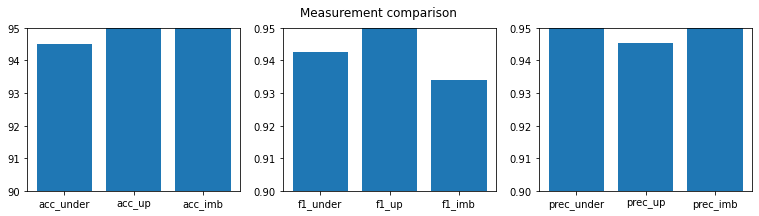

In [131]:
plt.figure(figsize=(13, 3))
plt.subplot(131)
plt.ylim(90,95)
plt.bar(['acc_under', 'acc_up', 'acc_imb'], [accuracy_undersampled, accuracy_upsampled, accuracy_imbalanced])
plt.subplot(132)
plt.ylim(0.9,0.95)
plt.bar(['f1_under', 'f1_up','f1_imb'], [f1_undersampled, f1_upsampled, f1_imbalanced])
plt.subplot(133)
plt.ylim(0.9,0.95)
plt.bar(['prec_under', 'prec_up', 'prec_imb'], [precision_undersampled, precision_upsampled, [precision_imbalanced]])
plt.suptitle('Measurement comparison')
plt.show()

# Gradient Boost sa cross validacijom

## KFold

### bez balansiranja

In [132]:
X_imbalanced = dataset.drop("label_spam",axis = 1).values
y_imbalanced = dataset["label_spam"].values
X_train_imbalanced,X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X_imbalanced,y_imbalanced,test_size = 0.2, random_state = 1)

kf = KFold(n_splits=5,random_state = 42, shuffle = True)

for train_index,test_index in kf.split(X_imbalanced):    
    gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
    params = gradient_booster.get_params()
    
    gradient_booster.fit(X_train_imbalanced,y_train_imbalanced)
    prediction_imbalanced=gradient_booster.predict(X_test_imbalanced)
    
    conf_matrix_imbalanced = confusion_matrix(y_true=y_test_imbalanced,y_pred=prediction_imbalanced)
    TP_imbalanced = conf_matrix_imbalanced[1,1]
    TN_imbalanced = conf_matrix_imbalanced[0,0]
    FP_imbalanced = conf_matrix_imbalanced[0,1]
    FN_imbalanced = conf_matrix_imbalanced[1,0]
    sensitivity_imbalanced = TP_imbalanced/(TP_imbalanced+FN_imbalanced)
    specificity_imbalanced = TN_imbalanced/(TN_imbalanced+FP_imbalanced)
    accuracy_imbalanced = accuracy_score(y_test_imbalanced,prediction_imbalanced)*100
    f1_imbalanced = f1_score(y_test_imbalanced, prediction_imbalanced)
    precision_imbalanced = precision_score(y_test_imbalanced, prediction_imbalanced)
    recall_imbalanced = recall_score(y_test_imbalanced, prediction_imbalanced)
    
    print("Accuracy: ", accuracy_imbalanced)
    print("F1 Score: ", f1_imbalanced)
    print("Precision: ", precision_imbalanced)
    print("Recall: ", recall_imbalanced)
    print("Specificity: ", specificity_imbalanced)
    print("Sensitivity: ", sensitivity_imbalanced)
    print("True positive: ", TP_imbalanced)
    print("False positive: ", FP_imbalanced)
    print("True negative: ", TN_imbalanced)
    print("False negative: ", FN_imbalanced)
    print("-------------")

Accuracy:  95.00542888165037
F1 Score:  0.9340974212034385
Precision:  0.9560117302052786
Recall:  0.9131652661064426
Specificity:  0.973404255319149
Sensitivity:  0.9131652661064426
True positive:  326
False positive:  15
True negative:  549
False negative:  31
-------------
Accuracy:  95.00542888165037
F1 Score:  0.9340974212034385
Precision:  0.9560117302052786
Recall:  0.9131652661064426
Specificity:  0.973404255319149
Sensitivity:  0.9131652661064426
True positive:  326
False positive:  15
True negative:  549
False negative:  31
-------------
Accuracy:  95.11400651465797
F1 Score:  0.9356223175965666
Precision:  0.956140350877193
Recall:  0.9159663865546218
Specificity:  0.973404255319149
Sensitivity:  0.9159663865546218
True positive:  327
False positive:  15
True negative:  549
False negative:  30
-------------
Accuracy:  95.00542888165037
F1 Score:  0.9340974212034385
Precision:  0.9560117302052786
Recall:  0.9131652661064426
Specificity:  0.973404255319149
Sensitivity:  0.9131

### undersampling

In [119]:
#gradient boost
X_undersampled = df_undersampled.drop("label_spam",axis = 1).values
y_undersampled = df_undersampled["label_spam"].values
X_train_undersampled,X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled,y_undersampled,test_size = 0.2, random_state = 1)

kf = KFold(n_splits=5,random_state = 42, shuffle = True)

for train_index,test_index in kf.split(X_undersampled):
    X_train_undersampled,X_test_undersampled=X_undersampled[train_index],X_undersampled[test_index]
    y_train_undersampled,y_test_undersampled=y_undersampled[train_index],y_undersampled[test_index]
    
    gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
    params = gradient_booster.get_params()
    
    gradient_booster.fit(X_train_undersampled,y_train_undersampled)
    prediction_undersampled=gradient_booster.predict(X_test_undersampled)
    
    conf_matrix_undersampled = confusion_matrix(y_true=y_test_undersampled,y_pred=prediction_undersampled)
    TP_undersampled = conf_matrix_undersampled[1,1]
    TN_undersampled = conf_matrix_undersampled[0,0]
    FP_undersampled = conf_matrix_undersampled[0,1]
    FN_undersampled = conf_matrix_undersampled[1,0]
    sensitivity_undersampled = TP_undersampled/(TP_undersampled+FN_undersampled)
    specificity_undersampled = TN_undersampled/(TN_undersampled+FP_undersampled)
    accuracy_undersampled = accuracy_score(y_test_undersampled,prediction_undersampled)*100
    f1_undersampled = f1_score(y_test_undersampled, prediction_undersampled)
    precision_undersampled = precision_score(y_test_undersampled, prediction_undersampled)
    recall_undersampled = recall_score(y_test_undersampled, prediction_undersampled)
    
    print("Accuracy: ", accuracy_undersampled)
    print("F1 Score: ", f1_undersampled)
    print("Precision: ", precision_undersampled)
    print("Recall: ", recall_undersampled)
    print("Specificity: ", specificity_undersampled)
    print("Sensitivity: ", sensitivity_undersampled)
    print("True positive: ", TP_undersampled)
    print("False positive: ", FP_undersampled)
    print("True negative: ", TN_undersampled)
    print("False negative: ", FN_undersampled)
    print("-------------")


Accuracy:  94.0771349862259
F1 Score:  0.9375907111756169
Precision:  0.9444444444444444
Recall:  0.930835734870317
Specificity:  0.9498680738786279
Sensitivity:  0.930835734870317
True positive:  323
False positive:  19
True negative:  360
False negative:  24
-------------
Accuracy:  93.79310344827586
F1 Score:  0.9363507779349363
Precision:  0.9403409090909091
Recall:  0.9323943661971831
Specificity:  0.9432432432432433
Sensitivity:  0.9323943661971831
True positive:  331
False positive:  21
True negative:  349
False negative:  24
-------------
Accuracy:  93.65517241379311
F1 Score:  0.9378378378378378
Precision:  0.9455040871934605
Recall:  0.9302949061662198
Specificity:  0.9431818181818182
Sensitivity:  0.9302949061662198
True positive:  347
False positive:  20
True negative:  332
False negative:  26
-------------
Accuracy:  94.62068965517241
F1 Score:  0.946938775510204
Precision:  0.9613259668508287
Recall:  0.9329758713136729
Specificity:  0.9602272727272727
Sensitivity:  0.932

### upsampling

In [133]:
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

kf = KFold(n_splits=5,random_state = 42, shuffle = True)

for train_index,test_index in kf.split(X_upsampled):
    X_train_upsampled,X_test_upsampled=X_upsampled[train_index],X_upsampled[test_index]
    y_train_upsampled,y_test_upsampled=y_upsampled[train_index],y_upsampled[test_index]
    
    gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
    params = gradient_booster.get_params()
    
    gradient_booster.fit(X_train_upsampled,y_train_upsampled)
    prediction_upsampled=gradient_booster.predict(X_test_upsampled)
    
    conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
    TP_upsampled = conf_matrix_upsampled[1,1]
    TN_upsampled = conf_matrix_upsampled[0,0]
    FP_upsampled = conf_matrix_upsampled[0,1]
    FN_upsampled = conf_matrix_upsampled[1,0]
    sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
    specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
    accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
    f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
    precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
    recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)
    
    print("Accuracy: ", accuracy_upsampled)
    print("F1 Score: ", f1_upsampled)
    print("Precision: ", precision_upsampled)
    print("Recall: ", recall_upsampled)
    print("Specificity: ", specificity_upsampled)
    print("Sensitivity: ", sensitivity_upsampled)
    print("True positive: ", TP_upsampled)
    print("False positive: ", FP_upsampled)
    print("True negative: ", TN_upsampled)
    print("False negative: ", FN_upsampled)
    print("-------------")

Accuracy:  95.96774193548387
F1 Score:  0.9581395348837208
Precision:  0.9590316573556797
Recall:  0.9572490706319703
Specificity:  0.9619377162629758
Sensitivity:  0.9572490706319703
True positive:  515
False positive:  22
True negative:  556
False negative:  23
-------------
Accuracy:  96.23318385650225
F1 Score:  0.9615384615384616
Precision:  0.9562841530054644
Recall:  0.9668508287292817
Specificity:  0.958041958041958
Sensitivity:  0.9668508287292817
True positive:  525
False positive:  24
True negative:  548
False negative:  18
-------------
Accuracy:  95.15695067264573
F1 Score:  0.9523809523809526
Precision:  0.9557522123893806
Recall:  0.9490333919156415
Specificity:  0.9542124542124543
Sensitivity:  0.9490333919156415
True positive:  540
False positive:  25
True negative:  521
False negative:  29
-------------
Accuracy:  95.33632286995515
F1 Score:  0.9530685920577617
Precision:  0.9565217391304348
Recall:  0.9496402877697842
Specificity:  0.9570661896243292
Sensitivity:  0.

## Repeated KFold

### bez balansiranja

In [134]:
X_imbalanced = dataset.drop("label_spam",axis = 1).values
y_imbalanced = dataset["label_spam"].values
X_train_imbalanced,X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X_imbalanced,y_imbalanced,test_size = 0.2, random_state = 1)

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

for train_index,test_index in kf.split(X_imbalanced):
    X_train_imbalanced,X_test_imbalanced=X_imbalanced[train_index],X_imbalanced[test_index]
    y_train_imbalanced,y_test_imbalanced=y_imbalanced[train_index],y_imbalanced[test_index]
    
    logistic_regression_model_imbalanced = LogisticRegression(max_iter = 3000)
    logistic_regression_model_imbalanced.fit(X_train_imbalanced,y_train_imbalanced)
    prediction_imbalanced = logistic_regression_model_imbalanced.predict(X_test_imbalanced)
    
    conf_matrix_imbalanced = confusion_matrix(y_true=y_test_imbalanced,y_pred=prediction_imbalanced)
    TP_imbalanced = conf_matrix_imbalanced[1,1]
    TN_imbalanced = conf_matrix_imbalanced[0,0]
    FP_imbalanced = conf_matrix_imbalanced[0,1]
    FN_imbalanced = conf_matrix_imbalanced[1,0]
    sensitivity_imbalanced = TP_imbalanced/(TP_imbalanced+FN_imbalanced)
    specificity_imbalanced = TN_imbalanced/(TN_imbalanced+FP_imbalanced)
    accuracy_imbalanced = accuracy_score(y_test_imbalanced,prediction_imbalanced)*100
    f1_imbalanced = f1_score(y_test_imbalanced, prediction_imbalanced)
    precision_imbalanced = precision_score(y_test_imbalanced, prediction_imbalanced)
    recall_imbalanced = recall_score(y_test_imbalanced, prediction_imbalanced)
    
    print("Accuracy: ", accuracy_imbalanced)
    print("F1 Score: ", f1_imbalanced)
    print("Precision: ", precision_imbalanced)
    print("Recall: ", recall_imbalanced)
    print("Specificity: ", specificity_imbalanced)
    print("Sensitivity: ", sensitivity_imbalanced)
    print("True positive: ", TP_imbalanced)
    print("False positive: ", FP_imbalanced)
    print("True negative: ", TN_imbalanced)
    print("False negative: ", FN_imbalanced)
    print("-------------")

Accuracy:  92.84164859002169
F1 Score:  0.9090909090909092
Precision:  0.9217877094972067
Recall:  0.8967391304347826
Specificity:  0.9494584837545126
Sensitivity:  0.8967391304347826
True positive:  165
False positive:  14
True negative:  263
False negative:  19
-------------
Accuracy:  93.91304347826087
F1 Score:  0.9166666666666667
Precision:  0.9447852760736196
Recall:  0.8901734104046243
Specificity:  0.9686411149825784
Sensitivity:  0.8901734104046243
True positive:  154
False positive:  9
True negative:  278
False negative:  19
-------------
Accuracy:  93.26086956521739
F1 Score:  0.9096209912536443
Precision:  0.975
Recall:  0.8524590163934426
Specificity:  0.9855595667870036
Sensitivity:  0.8524590163934426
True positive:  156
False positive:  4
True negative:  273
False negative:  27
-------------
Accuracy:  91.73913043478261
F1 Score:  0.9040404040404041
Precision:  0.927461139896373
Recall:  0.8817733990147784
Specificity:  0.9455252918287937
Sensitivity:  0.881773399014778

Accuracy:  94.57700650759219
F1 Score:  0.9326145552560647
Precision:  0.9301075268817204
Recall:  0.9351351351351351
Specificity:  0.9528985507246377
Sensitivity:  0.9351351351351351
True positive:  173
False positive:  13
True negative:  263
False negative:  12
-------------
Accuracy:  94.1304347826087
F1 Score:  0.9203539823008848
Precision:  0.9069767441860465
Recall:  0.9341317365269461
Specificity:  0.9453924914675768
Sensitivity:  0.9341317365269461
True positive:  156
False positive:  16
True negative:  277
False negative:  11
-------------
Accuracy:  94.34782608695652
F1 Score:  0.9322916666666666
Precision:  0.9521276595744681
Recall:  0.9132653061224489
Specificity:  0.9659090909090909
Sensitivity:  0.9132653061224489
True positive:  179
False positive:  9
True negative:  255
False negative:  17
-------------
Accuracy:  91.73913043478261
F1 Score:  0.8875739644970415
Precision:  0.872093023255814
Recall:  0.9036144578313253
Specificity:  0.9251700680272109
Sensitivity:  0.90

Accuracy:  93.058568329718
F1 Score:  0.9096045197740114
Precision:  0.9415204678362573
Recall:  0.8797814207650273
Specificity:  0.9640287769784173
Sensitivity:  0.8797814207650273
True positive:  161
False positive:  10
True negative:  268
False negative:  22
-------------
Accuracy:  90.8695652173913
F1 Score:  0.8771929824561403
Precision:  0.8670520231213873
Recall:  0.8875739644970414
Specificity:  0.9209621993127147
Sensitivity:  0.8875739644970414
True positive:  150
False positive:  23
True negative:  268
False negative:  19
-------------
Accuracy:  91.95652173913044
F1 Score:  0.8969359331476323
Precision:  0.9252873563218391
Recall:  0.8702702702702703
Specificity:  0.9527272727272728
Sensitivity:  0.8702702702702703
True positive:  161
False positive:  13
True negative:  262
False negative:  24
-------------
Accuracy:  93.69565217391305
F1 Score:  0.9164265129682997
Precision:  0.9298245614035088
Recall:  0.9034090909090909
Specificity:  0.9577464788732394
Sensitivity:  0.90

KeyboardInterrupt: 

### undersampling

In [135]:
X_undersampled = df_undersampled.drop("label_spam",axis = 1).values
y_undersampled = df_undersampled["label_spam"].values
X_train_undersampled,X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled,y_undersampled,test_size = 0.2, random_state = 1)

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

for train_index,test_index in kf.split(X_undersampled):
    X_train_undersampled,X_test_undersampled=X_undersampled[train_index],X_undersampled[test_index]
    y_train_undersampled,y_test_undersampled=y_undersampled[train_index],y_undersampled[test_index]
    
    logistic_regression_model_undersampled = LogisticRegression(max_iter = 3000)
    logistic_regression_model_undersampled.fit(X_train_undersampled,y_train_undersampled)
    prediction_undersampled = logistic_regression_model_undersampled.predict(X_test_undersampled)
    
    conf_matrix_undersampled = confusion_matrix(y_true=y_test_undersampled,y_pred=prediction_undersampled)
    TP_undersampled = conf_matrix_undersampled[1,1]
    TN_undersampled = conf_matrix_undersampled[0,0]
    FP_undersampled = conf_matrix_undersampled[0,1]
    FN_undersampled = conf_matrix_undersampled[1,0]
    sensitivity_undersampled = TP_undersampled/(TP_undersampled+FN_undersampled)
    specificity_undersampled = TN_undersampled/(TN_undersampled+FP_undersampled)
    accuracy_undersampled = accuracy_score(y_test_undersampled,prediction_undersampled)*100
    f1_undersampled = f1_score(y_test_undersampled, prediction_undersampled)
    precision_undersampled = precision_score(y_test_undersampled, prediction_undersampled)
    recall_undersampled = recall_score(y_test_undersampled, prediction_undersampled)
    
    print("Accuracy: ", accuracy_undersampled)
    print("F1 Score: ", f1_undersampled)
    print("Precision: ", precision_undersampled)
    print("Recall: ", recall_undersampled)
    print("Specificity: ", specificity_undersampled)
    print("Sensitivity: ", sensitivity_undersampled)
    print("True positive: ", TP_undersampled)
    print("False positive: ", FP_undersampled)
    print("True negative: ", TN_undersampled)
    print("False negative: ", FN_undersampled)
    print("-------------")

Accuracy:  92.8374655647383
F1 Score:  0.9252873563218391
Precision:  0.930635838150289
Recall:  0.92
Specificity:  0.9361702127659575
Sensitivity:  0.92
True positive:  161
False positive:  12
True negative:  176
False negative:  14
-------------
Accuracy:  92.8374655647383
F1 Score:  0.9269662921348314
Precision:  0.9322033898305084
Recall:  0.9217877094972067
Specificity:  0.9347826086956522
Sensitivity:  0.9217877094972067
True positive:  165
False positive:  12
True negative:  172
False negative:  14
-------------
Accuracy:  89.25619834710744
F1 Score:  0.8876080691642652
Precision:  0.9005847953216374
Recall:  0.875
Specificity:  0.9090909090909091
Sensitivity:  0.875
True positive:  154
False positive:  17
True negative:  170
False negative:  22
-------------
Accuracy:  94.21487603305785
F1 Score:  0.9405099150141643
Precision:  0.9431818181818182
Recall:  0.9378531073446328
Specificity:  0.946236559139785
Sensitivity:  0.9378531073446328
True positive:  166
False positive:  10


Accuracy:  92.01101928374655
F1 Score:  0.9201101928374656
Precision:  0.9175824175824175
Recall:  0.9226519337016574
Specificity:  0.9175824175824175
Sensitivity:  0.9226519337016574
True positive:  167
False positive:  15
True negative:  167
False negative:  14
-------------
Accuracy:  92.56198347107438
F1 Score:  0.9221902017291066
Precision:  0.9195402298850575
Recall:  0.9248554913294798
Specificity:  0.9263157894736842
Sensitivity:  0.9248554913294798
True positive:  160
False positive:  14
True negative:  176
False negative:  13
-------------
Accuracy:  94.21487603305785
F1 Score:  0.9433962264150944
Precision:  0.9408602150537635
Recall:  0.9459459459459459
Specificity:  0.9382022471910112
Sensitivity:  0.9459459459459459
True positive:  175
False positive:  11
True negative:  167
False negative:  10
-------------
Accuracy:  92.8374655647383
F1 Score:  0.9226190476190477
Precision:  0.9281437125748503
Recall:  0.9171597633136095
Specificity:  0.9381443298969072
Sensitivity:  0.

Accuracy:  94.49035812672176
F1 Score:  0.9470899470899472
Precision:  0.93717277486911
Recall:  0.9572192513368984
Specificity:  0.9318181818181818
Sensitivity:  0.9572192513368984
True positive:  179
False positive:  12
True negative:  164
False negative:  8
-------------
Accuracy:  94.76584022038568
F1 Score:  0.9449275362318841
Precision:  0.9532163742690059
Recall:  0.9367816091954023
Specificity:  0.9576719576719577
Sensitivity:  0.9367816091954023
True positive:  163
False positive:  8
True negative:  181
False negative:  11
-------------
Accuracy:  94.21487603305785
F1 Score:  0.9424657534246575
Precision:  0.9662921348314607
Recall:  0.9197860962566845
Specificity:  0.9659090909090909
Sensitivity:  0.9197860962566845
True positive:  172
False positive:  6
True negative:  170
False negative:  15
-------------
Accuracy:  87.87878787878788
F1 Score:  0.8757062146892656
Precision:  0.8959537572254336
Recall:  0.856353591160221
Specificity:  0.9010989010989011
Sensitivity:  0.85635

KeyboardInterrupt: 

### upsampling

In [136]:
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

for train_index,test_index in kf.split(X_upsampled):
    X_train_upsampled,X_test_upsampled=X_upsampled[train_index],X_upsampled[test_index]
    y_train_upsampled,y_test_upsampled=y_upsampled[train_index],y_upsampled[test_index]
    
    logistic_regression_model_upsampled = LogisticRegression(max_iter = 3000)
    logistic_regression_model_upsampled.fit(X_train_upsampled,y_train_upsampled)
    prediction_upsampled = logistic_regression_model_upsampled.predict(X_test_upsampled)
    
    conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
    TP_upsampled = conf_matrix_upsampled[1,1]
    TN_upsampled = conf_matrix_upsampled[0,0]
    FP_upsampled = conf_matrix_upsampled[0,1]
    FN_upsampled = conf_matrix_upsampled[1,0]
    sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
    specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
    accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
    f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
    precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
    recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)
    
    print("Accuracy: ", accuracy_upsampled)
    print("F1 Score: ", f1_upsampled)
    print("Precision: ", precision_upsampled)
    print("Recall: ", recall_upsampled)
    print("Specificity: ", specificity_upsampled)
    print("Sensitivity: ", sensitivity_upsampled)
    print("True positive: ", TP_upsampled)
    print("False positive: ", FP_upsampled)
    print("True negative: ", TN_upsampled)
    print("False negative: ", FN_upsampled)
    print("-------------")

Accuracy:  91.39784946236558
F1 Score:  0.9124087591240877
Precision:  0.8992805755395683
Recall:  0.9259259259259259
Specificity:  0.9027777777777778
Sensitivity:  0.9259259259259259
True positive:  250
False positive:  28
True negative:  260
False negative:  20
-------------
Accuracy:  94.6236559139785
F1 Score:  0.9477351916376306
Precision:  0.9477351916376306
Recall:  0.9477351916376306
Specificity:  0.9446494464944649
Sensitivity:  0.9477351916376306
True positive:  272
False positive:  15
True negative:  256
False negative:  15
-------------
Accuracy:  91.93548387096774
F1 Score:  0.918918918918919
Precision:  0.9239130434782609
Recall:  0.9139784946236559
Specificity:  0.9247311827956989
Sensitivity:  0.9139784946236559
True positive:  255
False positive:  21
True negative:  258
False negative:  24
-------------
Accuracy:  93.01075268817203
F1 Score:  0.9233791748526522
Precision:  0.94
Recall:  0.9073359073359073
Specificity:  0.9498327759197325
Sensitivity:  0.907335907335907

Accuracy:  92.1146953405018
F1 Score:  0.9197080291970803
Precision:  0.9197080291970803
Recall:  0.9197080291970803
Specificity:  0.9225352112676056
Sensitivity:  0.9197080291970803
True positive:  252
False positive:  22
True negative:  262
False negative:  22
-------------
Accuracy:  93.36917562724014
F1 Score:  0.9369676320272573
Precision:  0.9548611111111112
Recall:  0.919732441471572
Specificity:  0.9498069498069498
Sensitivity:  0.919732441471572
True positive:  275
False positive:  13
True negative:  246
False negative:  24
-------------
Accuracy:  93.72759856630825
F1 Score:  0.9328214971209214
Precision:  0.9274809160305344
Recall:  0.9382239382239382
Specificity:  0.9364548494983278
Sensitivity:  0.9382239382239382
True positive:  243
False positive:  19
True negative:  280
False negative:  16
-------------
Accuracy:  92.47311827956989
F1 Score:  0.9290540540540541
Precision:  0.9581881533101045
Recall:  0.9016393442622951
Specificity:  0.9525691699604744
Sensitivity:  0.90

Accuracy:  92.1146953405018
F1 Score:  0.9194139194139194
Precision:  0.9261992619926199
Recall:  0.9127272727272727
Specificity:  0.9293286219081273
Sensitivity:  0.9127272727272727
True positive:  251
False positive:  20
True negative:  263
False negative:  24
-------------
Accuracy:  92.1146953405018
F1 Score:  0.92
Precision:  0.9440298507462687
Recall:  0.8971631205673759
Specificity:  0.9456521739130435
Sensitivity:  0.8971631205673759
True positive:  253
False positive:  15
True negative:  261
False negative:  29
-------------
Accuracy:  92.831541218638
F1 Score:  0.9224806201550387
Precision:  0.937007874015748
Recall:  0.9083969465648855
Specificity:  0.9459459459459459
Sensitivity:  0.9083969465648855
True positive:  238
False positive:  16
True negative:  280
False negative:  24
-------------
Accuracy:  92.47311827956989
F1 Score:  0.9268292682926829
Precision:  0.9333333333333333
Recall:  0.9204152249134948
Specificity:  0.929368029739777
Sensitivity:  0.9204152249134948
Tr

Accuracy:  91.75627240143369
F1 Score:  0.915129151291513
Precision:  0.9117647058823529
Recall:  0.9185185185185185
Specificity:  0.9166666666666666
Sensitivity:  0.9185185185185185
True positive:  248
False positive:  24
True negative:  264
False negative:  22
-------------
Accuracy:  90.68100358422939
F1 Score:  0.9040590405904059
Precision:  0.8844765342960289
Recall:  0.9245283018867925
Specificity:  0.8907849829351536
Sensitivity:  0.9245283018867925
True positive:  245
False positive:  32
True negative:  261
False negative:  20
-------------
Accuracy:  93.36917562724014
F1 Score:  0.937394247038917
Precision:  0.9358108108108109
Recall:  0.9389830508474576
Specificity:  0.9277566539923955
Sensitivity:  0.9389830508474576
True positive:  277
False positive:  19
True negative:  244
False negative:  18
-------------
Accuracy:  94.26523297491039
F1 Score:  0.9372549019607843
Precision:  0.9637096774193549
Recall:  0.9122137404580153
Specificity:  0.9695945945945946
Sensitivity:  0.9

### NAIVE BAYES

In [140]:
#NaiveBayes
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

In [143]:
model = MultinomialNB()
model.fit(X_train_upsampled,y_train_upsampled)
prediction_upsampled = model.predict(X_test_upsampled)

In [144]:
conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
TP_upsampled = conf_matrix_upsampled[1,1]
TN_upsampled = conf_matrix_upsampled[0,0]
FP_upsampled = conf_matrix_upsampled[0,1]
FN_upsampled = conf_matrix_upsampled[1,0]
sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)

In [145]:
print("Accuracy: ", accuracy_upsampled)
print("F1 Score: ", f1_upsampled)
print("Precision: ", precision_upsampled)
print("Recall: ", recall_upsampled)
print("Specificity: ", specificity_upsampled)
print("Sensitivity: ", sensitivity_upsampled)
print("True positive: ", TP_upsampled)
print("False positive: ", FP_upsampled)
print("True negative: ", TN_upsampled)
print("False negative: ", FN_upsampled)

Accuracy:  78.31541218637993
F1 Score:  0.7708333333333334
Precision:  0.8156312625250501
Recall:  0.7307001795332136
Specificity:  0.8354203935599285
Sensitivity:  0.7307001795332136
True positive:  407
False positive:  92
True negative:  467
False negative:  150


### RANDOM FOREST

In [146]:
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

In [147]:
#random forest
random_forest = RandomForestClassifier(max_depth=25, random_state=0)
random_forest.fit(X_train_upsampled,y_train_upsampled)
prediction_upsampled = random_forest.predict(X_test_upsampled)

In [148]:
conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
TP_upsampled = conf_matrix_upsampled[1,1]
TN_upsampled = conf_matrix_upsampled[0,0]
FP_upsampled = conf_matrix_upsampled[0,1]
FN_upsampled = conf_matrix_upsampled[1,0]
sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)

In [149]:
print("Accuracy: ", accuracy_upsampled)
print("F1 Score: ", f1_upsampled)
print("Precision: ", precision_upsampled)
print("Recall: ", recall_upsampled)
print("Specificity: ", specificity_upsampled)
print("Sensitivity: ", sensitivity_upsampled)
print("True positive: ", TP_upsampled)
print("False positive: ", FP_upsampled)
print("True negative: ", TN_upsampled)
print("False negative: ", FN_upsampled)

Accuracy:  96.95340501792114
F1 Score:  0.9699115044247787
Precision:  0.956369982547993
Recall:  0.9838420107719928
Specificity:  0.9552772808586762
Sensitivity:  0.9838420107719928
True positive:  548
False positive:  25
True negative:  534
False negative:  9


### k - NEAREST NEIGHBORS

In [152]:
#knn
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, y_upsampled, test_size=0.20)
scaler = StandardScaler()
X_train_upsampled = scaler.fit_transform(X_train_upsampled)
X_test_upsampled = scaler.transform(X_test_upsampled)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_upsampled,y_train_upsampled)
prediction_upsampled = classifier.predict(X_test_upsampled)

In [153]:
conf_matrix_upsampled = confusion_matrix(y_true=y_test_upsampled,y_pred=prediction_upsampled)
TP_upsampled = conf_matrix_upsampled[1,1]
TN_upsampled = conf_matrix_upsampled[0,0]
FP_upsampled = conf_matrix_upsampled[0,1]
FN_upsampled = conf_matrix_upsampled[1,0]
sensitivity_upsampled = TP_upsampled/(TP_upsampled+FN_upsampled)
specificity_upsampled = TN_upsampled/(TN_upsampled+FP_upsampled)
accuracy_upsampled = accuracy_score(y_test_upsampled,prediction_upsampled)*100
f1_upsampled = f1_score(y_test_upsampled, prediction_upsampled)
precision_upsampled = precision_score(y_test_upsampled, prediction_upsampled)
recall_upsampled = recall_score(y_test_upsampled, prediction_upsampled)

In [154]:
print("Accuracy: ", accuracy_upsampled)
print("F1 Score: ", f1_upsampled)
print("Precision: ", precision_upsampled)
print("Recall: ", recall_upsampled)
print("Specificity: ", specificity_upsampled)
print("Sensitivity: ", sensitivity_upsampled)
print("True positive: ", TP_upsampled)
print("False positive: ", FP_upsampled)
print("True negative: ", TN_upsampled)
print("False negative: ", FN_upsampled)

Accuracy:  92.29390681003584
F1 Score:  0.9223826714801444
Precision:  0.9012345679012346
Recall:  0.944547134935305
Specificity:  0.9026086956521739
Sensitivity:  0.944547134935305
True positive:  511
False positive:  56
True negative:  519
False negative:  30


# Algoritmi za redukciju dimenzionalnosti
### RECURSIVE FEATURE ELIMINATION - RFE

In [155]:
#RFE feature reduction over logistic regression model
X = df_undersampled.drop("label_spam", axis = 1)
y = df_undersampled["label_spam"]
model = LogisticRegression(max_iter = 3000)
rfe_model = RFE(model, n_features_to_select = 5)
rfe_prediction = rfe_model.fit(X,y)
feature_list = rfe_prediction.get_support(indices=True)
key_columns = []
for feature in feature_list:
    print(df_undersampled.columns[feature])
    key_columns.append(df_undersampled.columns[feature])
key_columns.append("label_spam")
    

word_freq_remove
word_freq_000
word_freq_george
word_freq_cs
char_freq_$


In [156]:
columns_to_remove = []
df_rfe = df_undersampled.copy(deep=True)
for column in df_rfe.columns:
    if column not in key_columns:
        columns_to_remove.append(column)
        
rfe_removed = df_rfe.drop(columns_to_remove, axis=1)
rfe_removed.head()
        

,word_freq_remove,word_freq_000,word_freq_george,word_freq_cs,char_freq_$,label_spam
3795,0.0,0.0,0.00,0.0,0.0,0
4025,0.0,0.0,1.03,0.0,0.0,0
4329,0.0,0.0,0.00,0.0,0.0,0
3437,0.0,0.0,0.00,0.0,0.0,0
2371,0.0,0.0,0.00,0.0,0.0,0


In [157]:
X = rfe_removed.drop("label_spam",axis = 1).values
y = rfe_removed["label_spam"].values
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

rfe_logistic_regression_model = LogisticRegression(max_iter = 3000)
rfe_logistic_regression_model.fit(X_train,y_train)
rfe_prediction = rfe_logistic_regression_model.predict(X_test)

In [158]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=rfe_prediction)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy = accuracy_score(y_test,rfe_prediction)*100
f1 = f1_score(y_test, rfe_prediction)
precision = precision_score(y_test, rfe_prediction)
recall = recall_score(y_test, rfe_prediction)

In [159]:
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("True positive: ", TP)
print("False positive: ", FP)
print("True negative: ", TN)
print("False negative: ", FN)

Accuracy:  83.60881542699724
F1 Score:  0.8120063191153238
Precision:  0.921146953405018
Recall:  0.7259887005649718
Specificity:  0.9408602150537635
Sensitivity:  0.7259887005649718
True positive:  257
False positive:  22
True negative:  350
False negative:  97


### LASSO

In [160]:
#Lasso
X = df_undersampled.drop("label_spam", axis = 1)
y = df_undersampled["label_spam"]
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
lasso = LassoCV(cv=3)
select_from_model = SelectFromModel(lasso,threshold = 0.01)
select_from_model.fit(X, y)
feature_list = select_from_model.get_support(indices=True)
key_columns = []
for feature in feature_list:
    print(df_undersampled.columns[feature])
    key_columns.append(df_undersampled.columns[feature])
    
key_columns.append("label_spam")


word_freq_free
word_freq_you
word_freq_your
word_freq_hp
word_freq_george


In [161]:
columns_to_remove = []
df_lasso = df_undersampled.copy(deep=True)
for column in df_lasso.columns:
    if column not in key_columns:
        columns_to_remove.append(column)
        
lasso_removed = df_lasso.drop(columns_to_remove, axis=1)
lasso_removed.head()

,word_freq_free,word_freq_you,word_freq_your,word_freq_hp,word_freq_george,label_spam
3795,0.0,6.00,0.00,0.00,0.00,0
4025,0.0,2.41,1.03,2.06,1.03,0
4329,0.0,2.96,0.00,0.00,0.00,0
3437,0.0,2.00,8.00,0.00,0.00,0
2371,0.0,1.72,0.00,0.00,0.00,0


In [162]:
X = lasso_removed.drop("label_spam",axis = 1).values
y = lasso_removed["label_spam"].values
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

lasso_logistic_regression_model = LogisticRegression(max_iter = 3000)
lasso_logistic_regression_model.fit(X_train,y_train)
lasso_prediction = lasso_logistic_regression_model.predict(X_test)

In [163]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=lasso_prediction)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy = accuracy_score(y_test,lasso_prediction)*100
f1 = f1_score(y_test, lasso_prediction)
precision = precision_score(y_test, lasso_prediction)
recall = recall_score(y_test, lasso_prediction)

In [164]:
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("True positive: ", TP)
print("False positive: ", FP)
print("True negative: ", TN)
print("False negative: ", FN)

Accuracy:  83.7465564738292
F1 Score:  0.8289855072463769
Precision:  0.8511904761904762
Recall:  0.807909604519774
Specificity:  0.8655913978494624
Sensitivity:  0.807909604519774
True positive:  286
False positive:  50
True negative:  322
False negative:  68


### EXTRA TREE

In [165]:
et_classifier = ExtraTreesClassifier()
et_classifier.fit(X,y)
select_from_model = SelectFromModel(et_classifier, threshold = 0.05)
select_from_model.fit(X,y)
feature_list = select_from_model.get_support(indices=True)
for feature in feature_list:
    print(df_undersampled.columns[feature])


word_freq_make
word_freq_address
word_freq_all
word_freq_3d
word_freq_our


### PRINCIPAL COMPONENT ANALYSIS - PCA

In [166]:
#PCA feature variances
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
feature_variances = pca.explained_variance_ratio_
feature_variances

array([0.57259956, 0.19844974, 0.11957735, 0.06789583, 0.04147752])

# Kombinacija logističke regresije sa PCA algoritmom

In [172]:
#PCA decomposition over LogisticRegression
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train, y_test = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

pca = PCA(n_components = 20)
X_train_upsampled = pca.fit_transform(X_train_upsampled)
X_test_upsampled = pca.transform(X_test_upsampled)
logmodel=LogisticRegression(max_iter = 3000)
logmodel.fit(X_train_upsampled, y_train)
prediction = logmodel.predict(X_test_upsampled)

In [173]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=prediction)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
accuracy = accuracy_score(y_test,prediction)*100
f1 = f1_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

In [174]:
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)
print("True positive: ", TP)
print("False positive: ", FP)
print("True negative: ", TN)
print("False negative: ", FN)

Accuracy:  90.68100358422939
F1 Score:  0.9092495636998256
Precision:  0.8845500848896435
Recall:  0.9353680430879713
Specificity:  0.8783542039355993
Sensitivity:  0.9353680430879713
True positive:  521
False positive:  68
True negative:  491
False negative:  36


### RIDGE REGRESSION

In [175]:
#Ridge
#error over train set 
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train, y_test = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

model = Ridge(alpha = 0.04, normalize = True)
model_fit = model.fit(X_train_upsampled, y_train)
prediction_train = model_fit.predict(X_train_upsampled)
print("Train set errors:")
print(np.sqrt(mean_squared_error(y_train,prediction_train)))
print(r2_score(y_train, prediction_train))

#error over test set
prediction_test = model_fit.predict(X_test_upsampled)
print("Test set errors:")
print(np.sqrt(mean_squared_error(y_test,prediction_test)))
print(r2_score(y_test, prediction_test))

Train set errors:
0.3324841506999164
0.5578170692148967
Test set errors:
0.32474779391130537
0.5781541265670814


# ROC CURVE

In [176]:
X_upsampled = df_upsampled.drop("label_spam",axis = 1).values
y_upsampled = df_upsampled["label_spam"].values
X_train_upsampled,X_test_upsampled, y_train, y_test = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

In [184]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train_upsampled)
X_test_upsampled=sc.transform(X_test_upsampled)
logmodel=LogisticRegression(max_iter = 3000)
y_score = logmodel2.fit(X_train_upsampled, y_train).decision_function(X_test_upsampled)
logmodel.fit(X_train_upsampled,y_train)
prediction = logmodel.predict(X_test_upsampled)

In [189]:
fpr, tpr, threshold = roc_curve(y_test, prediction)
roc_auc = auc(fpr, tpr)

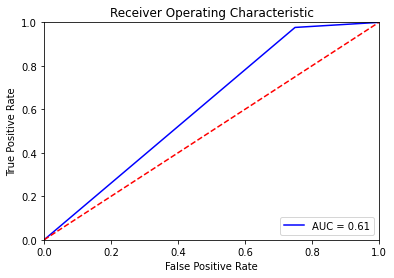

In [190]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()